In [1]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score

root_folder = 'C:/Users/Sankalp/Desktop/Projects/Premier League Prediction/premier_league_prediction_project'


In [2]:
def create_stats_table(soup, year):
    # Set General stats for every team
    print("\tCompiling General Stats")
    general_stats_table_id = f"results{year}-{year+1}91_overall"
    pl_general_stats_table = soup.find("table", attrs={"id": general_stats_table_id})
    general_stats = ['goals_for', 'goals_against', 'xg_for', 'xg_against', 'points']
    team_stats = {i.td.a.text:{} for i in pl_general_stats_table.tbody.find_all("tr")}
    for team_row in pl_general_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')         
            if stat in general_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Shooting stats for every team
    print("\tCompiling Shooting Stats")
    pl_shooting_stats_table = soup.find("table", attrs={"id": "stats_squads_shooting_for"})
    shooting_stats = ['shots', 'shots_on_target', 'average_shot_distance', 'shots_free_kicks', 'pens_made', 'pens_att']
    for team_row in pl_shooting_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in shooting_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Passing stats for every team
    print("\tCompiling Passing Stats")
    pl_passing_stats_table = soup.find("table", attrs={"id": "stats_squads_passing_for"})
    passing_stats = ['passes_into_final_third', 'assisted_shots', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes']
    for team_row in pl_passing_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in passing_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Goal and Shot Creation stats for every team
    print("\tCompiling Shot Creation Stats")
    pl_gca_stats_table = soup.find("table", attrs={"id": "stats_squads_gca_for"})
    goal_creation_stats = ['sca']
    for team_row in pl_gca_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in goal_creation_stats: 
                team_stats[team_name][stat] = team_stat.text

    # Set Possession stats for every team
    print("\tCompiling Possession Stats")
    pl_possession_stats_table = soup.find("table", attrs={"id": "stats_squads_possession_for"})
    possession_stats = ['possession', 'touches_att_3rd', 'touches_att_pen_area', 'progressive_passes_received']
    for team_row in pl_possession_stats_table.tbody.find_all("tr"):
        team_name = team_row.a.text
        for team_stat in team_row.find_all("td"):
            stat = team_stat.get('data-stat')
            if stat in possession_stats: 
                team_stats[team_name][stat] = team_stat.text


    return team_stats


# Pass type stats
# "TB" - completed pass sent between back defenders into open space.
# Add this if you want

In [3]:
def prepare_season_table(year, debug=False):
    
    # try to load json file
    filename = 'season' + '_' + str(year)[2:] + '_' + str(year + 1)[2:]
    try:
        with open(f'{root_folder}/data/{filename}.json') as f:
            season_stats = json.load(f)

    # if stats file does not exist, create one
    except:
        print(f"{filename}.json not found. Creating...")
        base_url = "https://fbref.com/en/comps/9/"
        url = base_url + f"{year}-{year+1}/{year}-{year+1}-Premier-League-Stats"
        data = requests.get(url)
        soup = BeautifulSoup(data.text)
        # print(soup)
        season_stats = create_stats_table(soup, year)

        # save the file as json
        with open(f"{root_folder}/data/{filename}.json", "w") as outfile:
            json.dump(season_stats, outfile)

    
    if debug: print(json.dumps(season_stats, indent=2))

    return season_stats


In [4]:
# Prepare data for each season
season_23_24 = prepare_season_table(2023)
season_22_23 = prepare_season_table(2022)
season_21_22 = prepare_season_table(2021)
season_20_21 = prepare_season_table(2020)
season_19_20 = prepare_season_table(2019)
season_18_29 = prepare_season_table(2018)
season_17_18 = prepare_season_table(2017, debug=True)

season_23_24.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Compiling Shot Creation Stats
	Compiling Possession Stats
season_22_23.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Compiling Shot Creation Stats
	Compiling Possession Stats
season_21_22.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Compiling Shot Creation Stats
	Compiling Possession Stats
season_20_21.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Compiling Shot Creation Stats
	Compiling Possession Stats
season_19_20.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Compiling Shot Creation Stats
	Compiling Possession Stats
season_18_19.json not found. Creating...
	Compiling General Stats
	Compiling Shooting Stats
	Compiling Passing Stats
	Co

In [5]:
# # Convert json files to DataFrames
# season_23_24 = pd.DataFrame(season_23_24)
# season_22_23 = pd.DataFrame(season_22_23)
# season_21_22 = pd.DataFrame(season_21_22)
# season_20_21 = pd.DataFrame(season_20_21)
# season_19_20 = pd.DataFrame(season_19_20)
# season_18_29 = pd.DataFrame(season_18_29)
# season_17_18 = pd.DataFrame(season_17_18)

In [6]:
full_data = pd.concat([pd.DataFrame(file).transpose() for file in [season_22_23, season_21_22, season_20_21, season_19_20, season_18_29, season_17_18]])
full_data = full_data.astype(float)
display(full_data)

,goals_for,goals_against,points,xg_for,xg_against,shots,shots_on_target,average_shot_distance,shots_free_kicks,pens_made,...,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,sca,possession,touches_att_3rd,touches_att_pen_area,progressive_passes_received
Manchester City,94.0,33.0,89.0,78.7,32.1,590.0,205.0,16.6,20.0,9.0,...,464.0,1770.0,445.0,75.0,2073.0,1099.0,64.7,8301.0,1277.0,2054.0
Arsenal,88.0,43.0,84.0,71.9,42.0,589.0,194.0,16.0,16.0,3.0,...,443.0,1637.0,459.0,62.0,2049.0,1045.0,59.3,8015.0,1296.0,2024.0
Manchester Utd,58.0,43.0,75.0,67.7,50.4,590.0,206.0,17.8,20.0,3.0,...,478.0,1268.0,398.0,57.0,1595.0,1051.0,53.7,6570.0,1036.0,1578.0
Newcastle Utd,68.0,33.0,71.0,72.0,39.6,565.0,184.0,15.6,15.0,6.0,...,435.0,1083.0,403.0,64.0,1618.0,1008.0,52.3,6516.0,1161.0,1599.0
Liverpool,75.0,47.0,67.0,72.6,50.9,601.0,203.0,16.2,7.0,2.0,...,458.0,1615.0,452.0,85.0,1992.0,1046.0,60.8,7149.0,1252.0,1974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Huddersfield,28.0,58.0,37.0,31.3,48.5,360.0,106.0,18.8,14.0,2.0,...,260.0,937.0,180.0,77.0,1210.0,621.0,45.7,5064.0,533.0,1189.0
Southampton,37.0,56.0,36.0,39.9,45.2,447.0,136.0,18.1,11.0,3.0,...,343.0,1154.0,288.0,77.0,1609.0,799.0,51.3,5644.0,700.0,1592.0
Swansea City,28.0,56.0,33.0,31.6,58.6,338.0,95.0,18.2,15.0,1.0,...,223.0,973.0,190.0,57.0,1194.0,581.0,45.3,4554.0,536.0,1174.0
Stoke City,35.0,68.0,33.0,36.5,62.5,380.0,122.0,18.1,11.0,0.0,...,288.0,921.0,230.0,60.0,1150.0,669.0,41.4,4268.0,596.0,1123.0


Features like 'shots' and 'xG' are cumulative for the entire season and therefore have high variance. Converting them to 'season averages' (stat per 90 minutes) should give better results. As there are 38 games in a season, we divide the feature column by 38.

In [7]:
cumulative_features = ['goals_for', 'goals_against', 'xg_for', 'xg_against', 'shots', 'shots_on_target', 'shots_free_kicks', 'pens_made', 
                       'pens_att', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'progressive_passes', 'sca', 
                       'touches_att_3rd', 'touches_att_pen_area', 'progressive_passes_received']

for feature in cumulative_features:
    full_data[feature] = full_data[feature] / 38

# Add the 'points per game' stat
full_data['points_per_game'] = full_data['points'] / 38

In [8]:
display(full_data)

,goals_for,goals_against,points,xg_for,xg_against,shots,shots_on_target,average_shot_distance,shots_free_kicks,pens_made,...,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,sca,possession,touches_att_3rd,touches_att_pen_area,progressive_passes_received,points_per_game
Manchester City,2.473684,0.868421,89.0,2.071053,0.844737,15.526316,5.394737,16.6,0.526316,0.236842,...,46.578947,11.710526,75.0,54.552632,28.921053,64.7,218.447368,33.605263,54.052632,2.342105
Arsenal,2.315789,1.131579,84.0,1.892105,1.105263,15.500000,5.105263,16.0,0.421053,0.078947,...,43.078947,12.078947,62.0,53.921053,27.500000,59.3,210.921053,34.105263,53.263158,2.210526
Manchester Utd,1.526316,1.131579,75.0,1.781579,1.326316,15.526316,5.421053,17.8,0.526316,0.078947,...,33.368421,10.473684,57.0,41.973684,27.657895,53.7,172.894737,27.263158,41.526316,1.973684
Newcastle Utd,1.789474,0.868421,71.0,1.894737,1.042105,14.868421,4.842105,15.6,0.394737,0.157895,...,28.500000,10.605263,64.0,42.578947,26.526316,52.3,171.473684,30.552632,42.078947,1.868421
Liverpool,1.973684,1.236842,67.0,1.910526,1.339474,15.815789,5.342105,16.2,0.184211,0.052632,...,42.500000,11.894737,85.0,52.421053,27.526316,60.8,188.131579,32.947368,51.947368,1.763158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Huddersfield,0.736842,1.526316,37.0,0.823684,1.276316,9.473684,2.789474,18.8,0.368421,0.052632,...,24.657895,4.736842,77.0,31.842105,16.342105,45.7,133.263158,14.026316,31.289474,0.973684
Southampton,0.973684,1.473684,36.0,1.050000,1.189474,11.763158,3.578947,18.1,0.289474,0.078947,...,30.368421,7.578947,77.0,42.342105,21.026316,51.3,148.526316,18.421053,41.894737,0.947368
Swansea City,0.736842,1.473684,33.0,0.831579,1.542105,8.894737,2.500000,18.2,0.394737,0.026316,...,25.605263,5.000000,57.0,31.421053,15.289474,45.3,119.842105,14.105263,30.894737,0.868421
Stoke City,0.921053,1.789474,33.0,0.960526,1.644737,10.000000,3.210526,18.1,0.289474,0.000000,...,24.236842,6.052632,60.0,30.263158,17.605263,41.4,112.315789,15.684211,29.552632,0.868421


<Axes: >

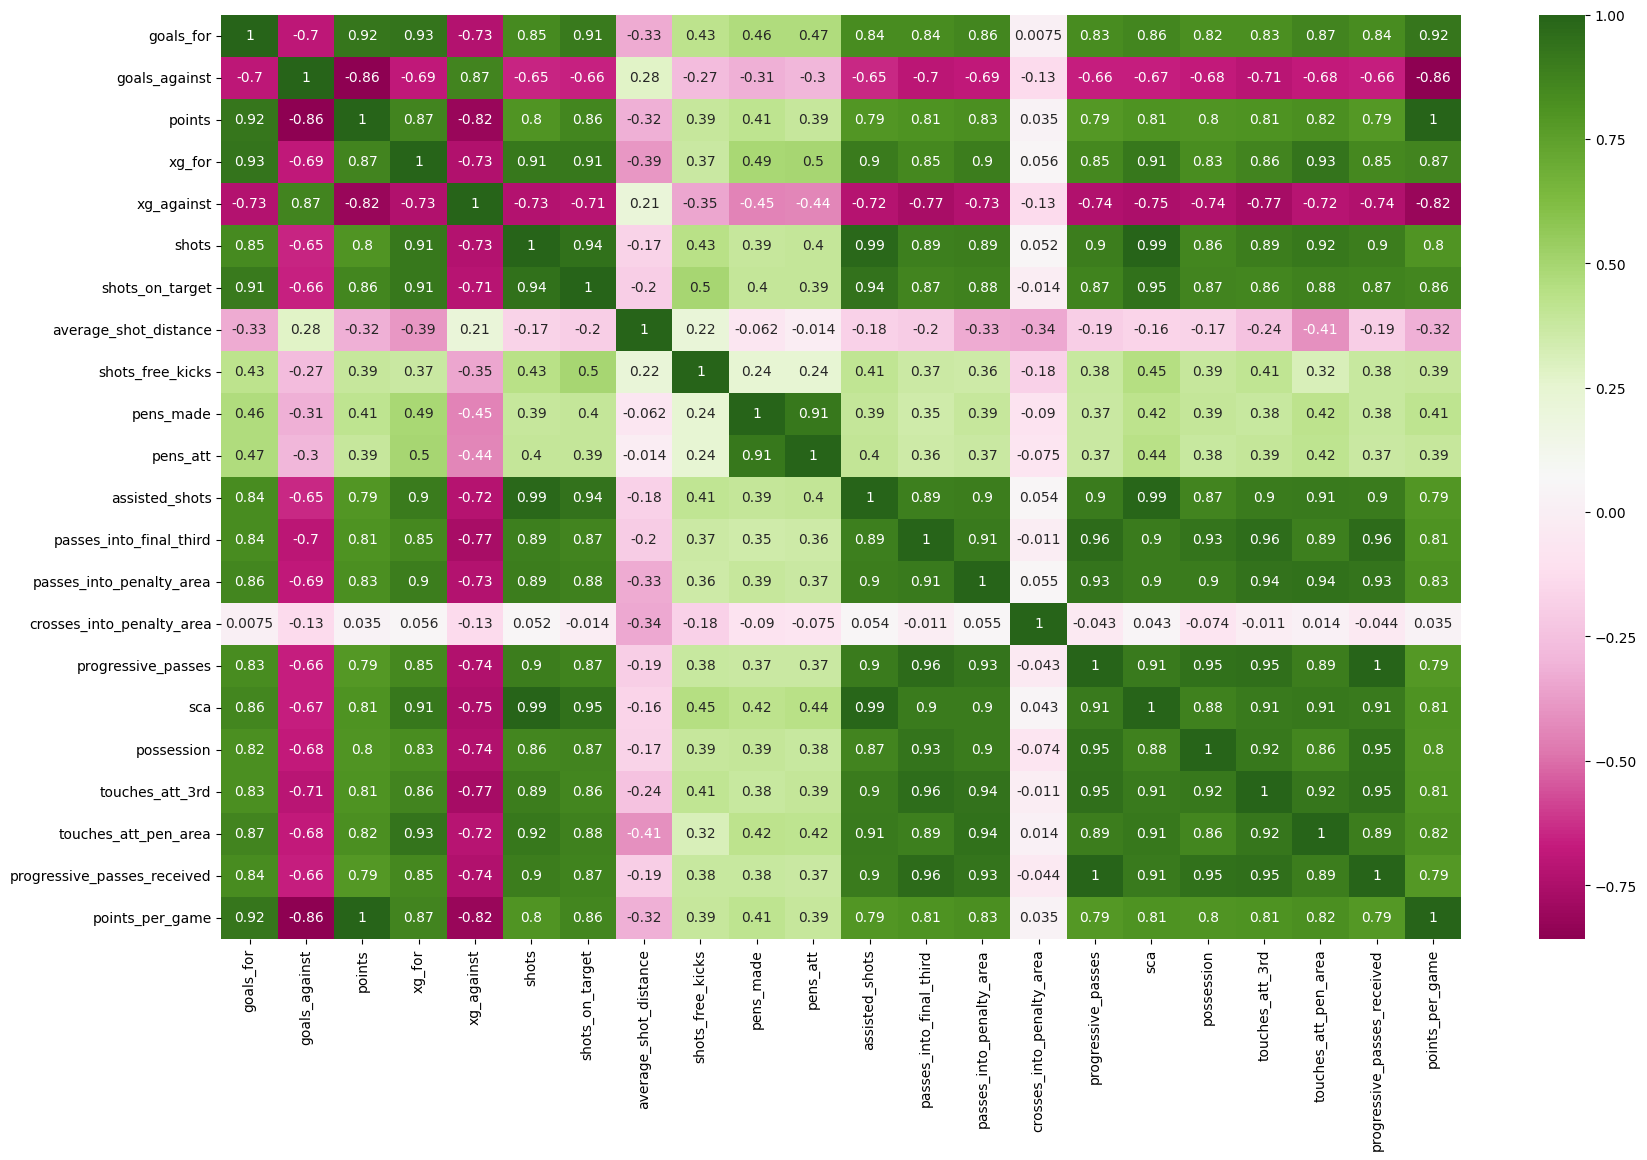

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(full_data.corr(), annot=True, cmap='PiYG')

We can see that almost every metric has a very good correlation with Points.

In [32]:
# Split the data into train and test sets
X = full_data.drop(['points', 'points_per_game', 'crosses_into_penalty_area'], axis=1).reset_index(drop=True)
y = full_data['points'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [33]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth=5)
rf  = RandomForestRegressor(n_estimators=800, max_features=15)
ada = AdaBoostRegressor(n_estimators=150, learning_rate=.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate=.05)
xgb = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=.05)
cbr  = CatBoostRegressor(learning_rate=.05, max_depth=7, verbose=0)

regressors = [(knn, 'K Nearest Neighbors'), (dt, 'Decision Tree'), (rf, 'Random Forest'), (ada, 'Ada Boost'), 
              (gbr, 'Gradient Boosting'), (xgb, 'XGB'), (cbr, 'Cat Boost')]

In [34]:
accuracies = []

for regressor, regressor_name in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test, y_pred), 4) * 100
    accuracies.append(accuracy)


<Axes: >

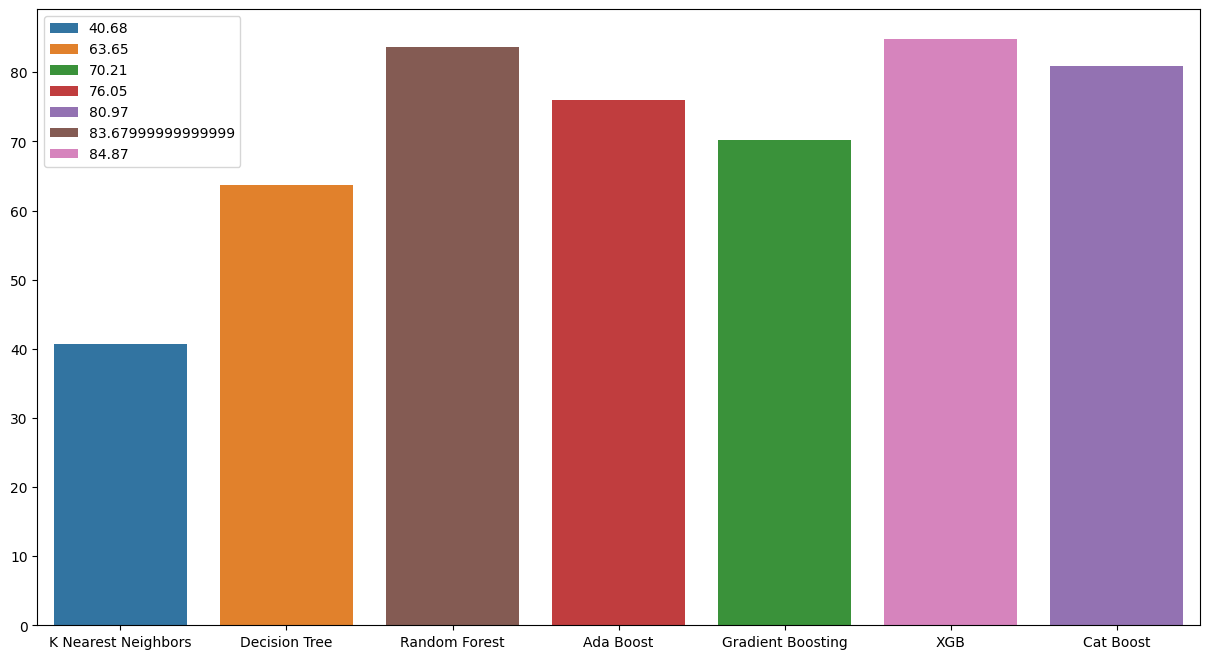

In [35]:
plt.figure(figsize=(15, 8))
sns.barplot(x=[name for _, name in regressors], y=accuracies, palette='tab10', hue=accuracies)

In [36]:
# Prepare the season_23_24 dataframe for prediction
season_23_24_test = pd.DataFrame(season_23_24).transpose()
season_23_24_test = season_23_24_test.astype('float')
season_23_24_test = season_23_24_test.drop(['points', 'crosses_into_penalty_area'], axis=1)

# Divide by 7 as only 7 games have been played so far in this season
for feature in cumulative_features:
    season_23_24_test[feature] = season_23_24_test[feature] / 7

# Add the 'points per game' stat
# season_23_24_test['points_per_game'] = season_23_24_test['points'] / 7


In [37]:
print("Season 23-24 Test Set")
display(season_23_24_test)

Season 23-24 Test Set


,goals_for,goals_against,xg_for,xg_against,shots,shots_on_target,average_shot_distance,shots_free_kicks,pens_made,pens_att,assisted_shots,passes_into_final_third,passes_into_penalty_area,progressive_passes,sca,possession,touches_att_3rd,touches_att_pen_area,progressive_passes_received
Manchester City,2.428571,0.714286,2.057143,0.728571,17.857143,7.142857,17.0,0.857143,0.142857,0.285714,14.714286,49.857143,12.142857,51.000000,33.857143,66.3,226.857143,31.142857,50.571429
Tottenham,2.428571,1.142857,1.871429,1.428571,19.714286,7.428571,17.5,0.142857,0.000000,0.000000,15.142857,42.571429,13.571429,57.571429,34.857143,60.0,226.285714,40.857143,57.285714
Arsenal,2.142857,0.857143,2.071429,0.871429,14.428571,5.285714,16.2,0.000000,0.714286,0.714286,11.285714,43.428571,13.571429,51.285714,27.428571,62.1,225.571429,35.285714,50.285714
Liverpool,2.285714,1.000000,2.071429,1.314286,16.142857,4.714286,16.7,0.571429,0.142857,0.285714,12.285714,31.142857,9.000000,44.428571,29.285714,52.4,163.000000,29.571429,43.857143
Aston Villa,2.571429,1.571429,1.928571,1.614286,14.571429,5.857143,16.0,0.428571,0.285714,0.285714,10.714286,33.428571,10.285714,37.285714,24.571429,48.6,137.714286,27.714286,37.142857
Brighton,2.714286,2.000000,2.028571,1.628571,16.571429,7.142857,17.3,0.142857,0.142857,0.142857,14.571429,35.285714,12.142857,48.857143,30.857143,62.1,180.428571,32.428571,48.428571
West Ham,1.857143,1.428571,1.585714,2.042857,12.142857,4.571429,14.6,0.142857,0.142857,0.142857,9.428571,19.428571,6.285714,26.000000,22.142857,38.1,105.428571,23.571429,26.000000
Newcastle Utd,2.571429,1.000000,2.185714,1.000000,15.000000,6.428571,16.1,0.142857,0.285714,0.285714,11.714286,27.857143,9.285714,38.142857,27.000000,51.9,147.000000,28.285714,38.000000
Crystal Palace,1.000000,1.000000,1.157143,1.357143,12.857143,4.714286,16.5,0.714286,0.000000,0.000000,10.000000,27.142857,7.142857,32.428571,22.571429,43.7,141.142857,21.428571,31.857143
Manchester Utd,1.000000,1.571429,1.600000,1.585714,15.428571,4.142857,16.6,0.285714,0.142857,0.142857,12.857143,38.571429,10.857143,50.285714,27.857143,52.4,185.857143,27.857143,49.857143


Predict using the best performing regressors

In [38]:
# for regressor, regressor_name in [(rf, 'Random Forest'), (xgb, 'XGB'), (cbr, 'Cat Boost')]:
#     y_pred = regressor.predict(season_23_24_test)
#     season_23_24_prediction[regressor_name] = y_pred

In [50]:
# Create a prediction DataFrame
season_23_24_prediction = pd.DataFrame(index = season_23_24_test.index)

# Predict using Random Forest Regressor
print("Random Forest Regressor")
y_pred = rf.predict(season_23_24_test)
season_23_24_prediction['Predicted Points'] = y_pred
season_23_24_prediction['Position'] = season_23_24_prediction.rank(ascending=False, method='first').astype('int')
display(season_23_24_prediction.sort_values('Predicted Points', ascending=False))


Random Forest Regressor


,Predicted Points,Position
Manchester City,93.56125,1
Tottenham,84.89875,2
Brighton,83.47125,3
Liverpool,81.87000,4
Newcastle Utd,80.84250,5
Arsenal,80.20500,6
Aston Villa,77.26000,7
Chelsea,62.89375,8
West Ham,61.13250,9
Brentford,58.68125,10


In [52]:
# Create a prediction DataFrame
season_23_24_prediction = pd.DataFrame(index = season_23_24_test.index)

# Predict using XGB Regressor
print("XGB Regressor")
y_pred = xgb.predict(season_23_24_test)
season_23_24_prediction['Predicted Points'] = y_pred
season_23_24_prediction['Position'] = season_23_24_prediction.rank(ascending=False, method='first').astype('int')
display(season_23_24_prediction.sort_values('Predicted Points', ascending=False))

XGB Regressor


,Predicted Points,Position
Manchester City,97.588264,1
Liverpool,82.942444,2
Newcastle Utd,82.396545,3
Tottenham,82.384949,4
Brighton,80.290993,5
Aston Villa,80.233215,6
Arsenal,67.443497,7
Chelsea,67.147888,8
Brentford,59.969242,9
West Ham,59.260494,10


In [51]:
# Create a prediction DataFrame
season_23_24_prediction = pd.DataFrame(index = season_23_24_test.index)

# Predict using CatBoost Regressor
print("CatBoost Regressor")
y_pred = cbr.predict(season_23_24_test)
season_23_24_prediction['Predicted Points'] = y_pred
season_23_24_prediction['Position'] = season_23_24_prediction.rank(ascending=False, method='first').astype('int')
display(season_23_24_prediction.sort_values('Predicted Points', ascending=False))

CatBoost Regressor


,Predicted Points,Position
Manchester City,88.736069,1
Arsenal,81.110367,2
Tottenham,72.289894,3
Liverpool,71.669350,4
Newcastle Utd,68.009991,5
Brighton,60.385117,6
Chelsea,60.273724,7
Aston Villa,58.853317,8
Brentford,56.473542,9
Manchester Utd,56.309560,10


As we can see, Manchester City come out on top in all the predictions. Bournemouth, Sheffiled United, and Burnley are predicted to get relegated by all the regressors. The rest of the table has some interesting and differentiating outcomes based on the regressor used. While CatBoost predicts Arsenal to finish second at the end of the season, both RandomForest and XGBoost regressors predict them to finish outside the UCL qualification bracket (top 4). Liverpool and Tottenham Hotspur are predicted to finish inside the top 4 in all the predictions. Sadly for Manchester United fans, their current performances indicate a predicted finish of outside the top 10.